# Планирование рекламных кампаний в игровой индустрии для интернет-магазина «Стримчик»

# Описание проекта
Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры.
Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, 
жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности.
Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й.
Нужно отработать принцип работы с данными. 
Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.  
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр.ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например,
«Для взрослых», «Для детей младшего возраста» или «Для подростков».Entertainment Software Rating Board (ESRB) — негосударственная организация, основное направление деятельности — принятие и определение рейтингов для компьютерных видеоигр и другого развлекательного программного обеспечения в США и Канаде. 

# Описание данных
-	Name — название игры
-	Platform — платформа
-	Year_of_Release — год выпуска
-	Genre — жанр игры
-	NA_sales — продажи в Северной Америке (миллионы проданных копий)
-	EU_sales — продажи в Европе (миллионы проданных копий)
-	JP_sales — продажи в Японии (миллионы проданных копий)
-	Other_sales — продажи в других странах (миллионы проданных копий)
-	Critic_Score — оценка критиков (максимум 100)
-	User_Score — оценка пользователей (максимум 10)
-	Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.
Данные за 2016 год могут быть неполными.

# Рейтинг от организации ESRB
- «E» («Everyone») — «Для всех»
- «T» («Teen») — «Подросткам»: Игра подходит для лиц от 13 лет. 
- «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»
- «M» («Mature») — «Для взрослых»: Материалы игры не подходят для лиц младше 17 лет.
- «RP» («Rating Pending») — «Рейтинг ожидается»
- «EC» («Early childhood») — «Для детей младшего возраста»:
- «AO» («Adults Only 18+») — «Только для взрослых»
- «K-A» («Kids to Adults») — «Для детей и взрослых»: Содержание игры вполне подходит для возрастной категории от 6 лет и старше.Позже в 1998 году был переименован в Е – для всех возрастов, а также чуть позже был добавлен рейтинг Е10+,как промежуточный между Е и Т 

## Подготовка данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats as st

In [2]:
games = pd.read_csv('games.csv')
games

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [3]:
number_of_passes = pd.concat([games.isna().sum(), (games.isnull().sum ()/ len(games)).map('{:.2%}'.format)], axis=1)
number_of_passes.columns = ['Количество пропущенных значений', 'Процент пропущенных значений']
number_of_passes

,Количество пропущенных значений,Процент пропущенных значений
Name,2,0.01%
Platform,0,0.00%
Year_of_Release,269,1.61%
Genre,2,0.01%
NA_sales,0,0.00%
EU_sales,0,0.00%
JP_sales,0,0.00%
Other_sales,0,0.00%
Critic_Score,8578,51.32%
User_Score,6701,40.09%


In [4]:
games.columns = games.columns.str.lower()
games.info()
print('_ '*20)
print('Количество дубликатов:',games.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
Количество дубликатов: 0


Явных дубликатов не обнаружено.  
Большое количество пропусков в столбцах Critic_Score,User_Score,Rating.  
В других столбцах пропусков мало,их можно удалить.

In [5]:
games.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


Максимальные значения сильно отличаются от 75% продаж в каждом столбце.

In [6]:
games.dropna(subset=['year_of_release','genre','name'],inplace=True) #удаляем пропуски

In [7]:
games['user_score'].unique() # посмотрим на уникальные значения в столбце 'user_score'

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [8]:
games['user_score'] = games['user_score'].replace('tbd',np.nan,regex=True)#Значение 'tbd' заменяем на NAN,по смыслу 'tbd'
games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

In [9]:
games['year_of_release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000., 1995., 1991., 1981., 1987., 1980.,
       1983.])

In [10]:
games['year_of_release'] = games['year_of_release'].astype('int') #изменение типа данных
games['user_score'] = games['user_score'].astype('float')
games['rating'] = games['rating'].fillna('No_rating')

In [11]:
games['sum_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']#просуммируем все продажи
games.sort_values('sum_sales',ascending=False)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,No_rating,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,No_rating,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16183,Uta no * Prince-Sama: Sweet Serenade,PSP,2011,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,No_rating,0.01
16184,Higurashi no Naku Koro ni Iki,PS3,2015,Action,0.00,0.00,0.01,0.00,NaN,NaN,No_rating,0.01
16714,Winning Post 8 2016,PSV,2016,Simulation,0.00,0.00,0.01,0.00,NaN,NaN,No_rating,0.01
16676,G1 Jockey 4 2008,PS3,2008,Sports,0.00,0.00,0.00,0.00,NaN,NaN,No_rating,0.00


## Исследовательский анализ данных

In [12]:
def without_hue(ax, feature): # добавим функция для подсчета процентов
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.2f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)

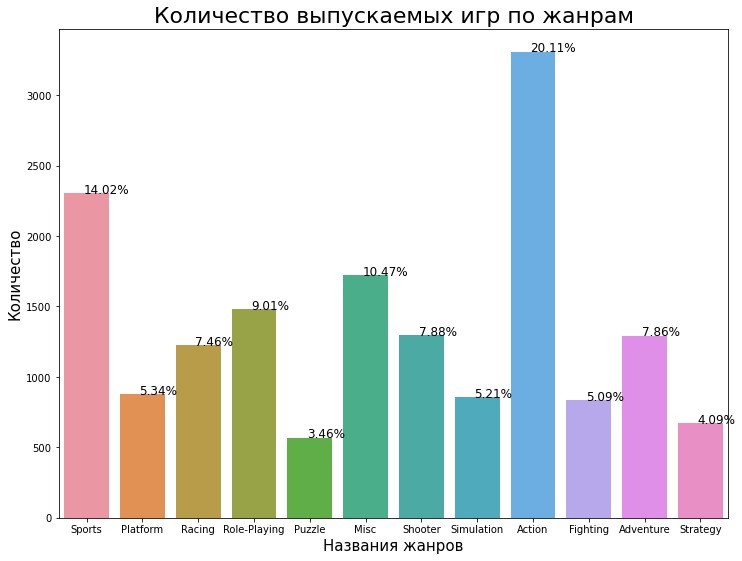

In [13]:
plt.figure(figsize=(12, 9))
ax = sns.countplot(data = games,x='genre')
plt.title('Количество выпускаемых игр по жанрам',fontsize=22)
plt.xlabel('Названия жанров',fontsize=15)
plt.ylabel('Количество',fontsize=15)
without_hue(ax,games['genre'])
plt.show()

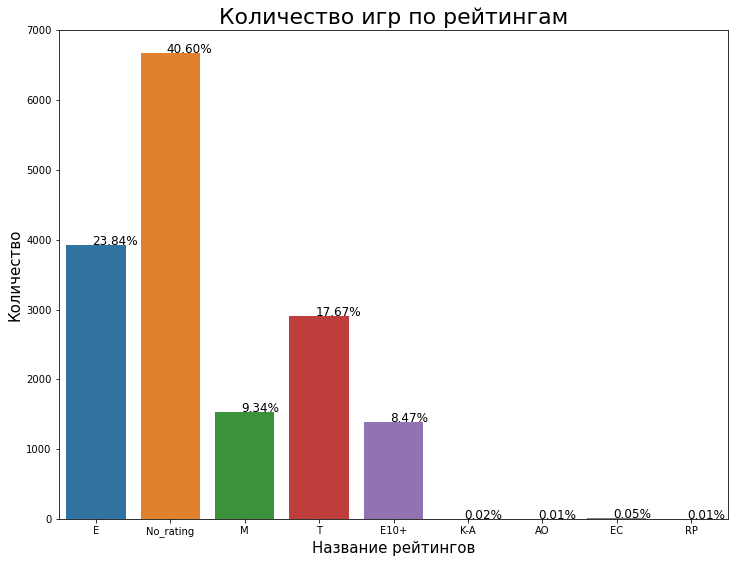

In [14]:
plt.figure(figsize=(12, 9))
ax = sns.countplot(data = games,x='rating')
plt.title('Количество игр по рейтингам',fontsize=22)
plt.xlabel('Название рейтингов',fontsize=15)
plt.ylabel('Количество',fontsize=15)
without_hue(ax,games['rating'])
plt.show()

Без рейтинга около 40,6% игр,это может быть связанно с тем что ESRB выставляет рейтинги по Северное Америки.  
Рейтинги «E»,«T»,«M»,«E10+» наиболее популярные рейтинги.  
Рейтинги «RP», «EC», «AO», «K-A» очень редко встречаются,в общем занимают меньше 0.1%

### Сколько игр выпускалось в разные годы

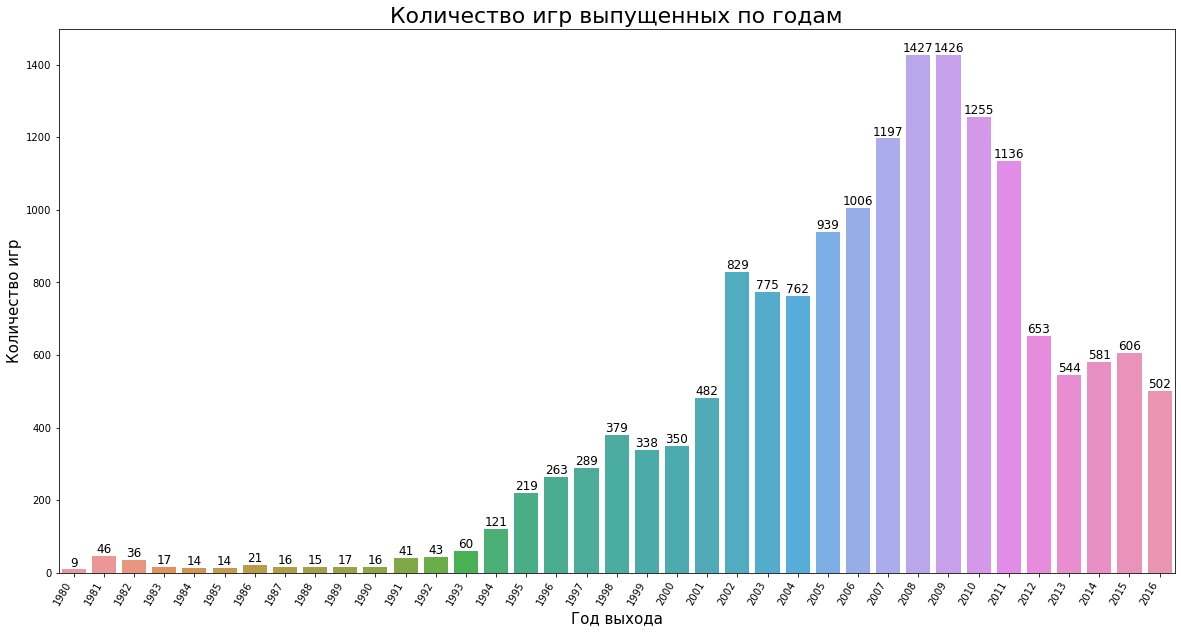

In [15]:
pivot_table_games_year = games.pivot_table(index = 'year_of_release',values = 'name', aggfunc = 'count').reset_index()

plt.figure(figsize=(20,10))
sns.barplot(data = pivot_table_games_year,x ='year_of_release',y='name')

for i, val in enumerate(pivot_table_games_year['name'].values):
    plt.text(i, val, int(val), horizontalalignment='center', verticalalignment='bottom',fontdict={'fontweight':500,'size':12})

# Decoration
plt.gca().set_xticklabels(pivot_table_games_year['year_of_release'], rotation=60, horizontalalignment= 'right')
plt.title("Количество игр выпущенных по годам", fontsize=22)
plt.ylabel('Количество игр',fontsize=15)
plt.xlabel('Год выхода',fontsize=15)
plt.show()

Количество компьютерных игр было на пике в 2009 году.После этого игр стало выпускаться меньше.

### Платформы с наибольшими суммарными продажами

In [16]:
pt_sum_sales_platform = games.pivot_table(index ='platform',values ='sum_sales',aggfunc = 'sum').sort_values('sum_sales',
                                                                                                    ascending = False)
pt_sum_sales_platform 

,sum_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


In [17]:
top_platform = ['PS2','PS3','X360','DS','Wii','PS']

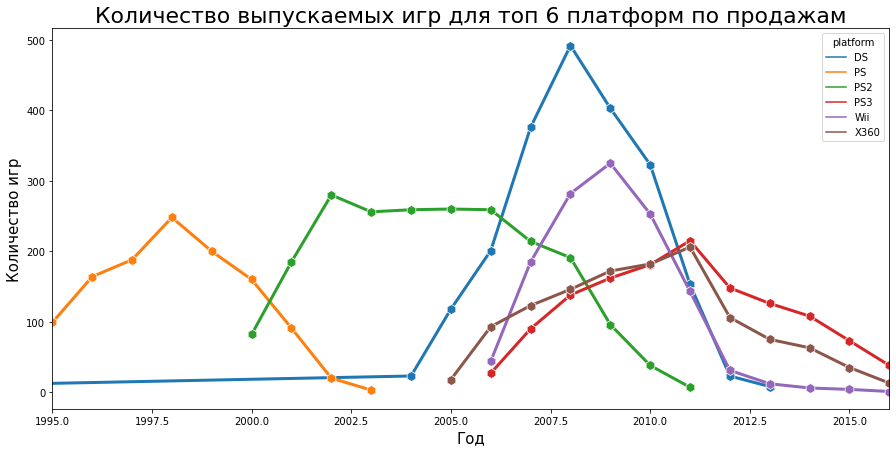

In [18]:
pt_top_platform = games.query('platform in @top_platform').pivot_table(index ='year_of_release',
                                                                       columns = 'platform',values = 'name',aggfunc = 'count')

plt.figure(figsize=(15,7))
sns.lineplot(data = pt_top_platform,dashes=False,linewidth=3,marker= 'h', markersize=10)
plt.xlim([1995, 2016])
plt.title('Количество выпускаемых игр для топ 6 платформ по продажам', fontsize=22)
plt.xlabel('Год',fontsize=15)
plt.ylabel('Количество игр',fontsize=15)
plt.show()

В среднем платформа живет около 10 лет,кроме платформы "PC".Пик  примерно по середине,с учетом этого можно выбрать период от 2012 ,и посмотреть на платформы ,которые идут в рост по количеству игр или по продажам.

### Актуальный период (эти данные помогут построить прогноз на 2017 год.)

В качестве актуального периода, на основании которого нужно будет строить прогноз на 2017 год, возьмем отрезок с 2012 года включительно

In [19]:
actual_period = games[games['year_of_release'] > 2011]
actual_period

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,No_rating,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,No_rating,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,No_rating,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,No_rating,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,No_rating,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,No_rating,0.01


### Поиск потенциально прибыльных платформ

In [20]:
actual_period.groupby('platform')['sum_sales'].sum().sort_values(ascending=False)

platform
PS4     314.14
PS3     288.79
X360    236.54
3DS     194.61
XOne    159.32
WiiU     82.19
PC       62.65
PSV      49.18
Wii      35.37
DS       12.55
PSP      11.19
Name: sum_sales, dtype: float64

In [21]:
actual_period.groupby('platform')['name'].count().sort_values(ascending=False)

platform
PS3     493
PSV     411
3DS     396
PS4     392
X360    292
PC      250
XOne    247
PSP     173
WiiU    147
Wii      54
DS       31
Name: name, dtype: int64

In [22]:
top_sales_platform = ['PS4','PS3','X360','3DS','XOne','WiiU','PC','PSV','Wii']

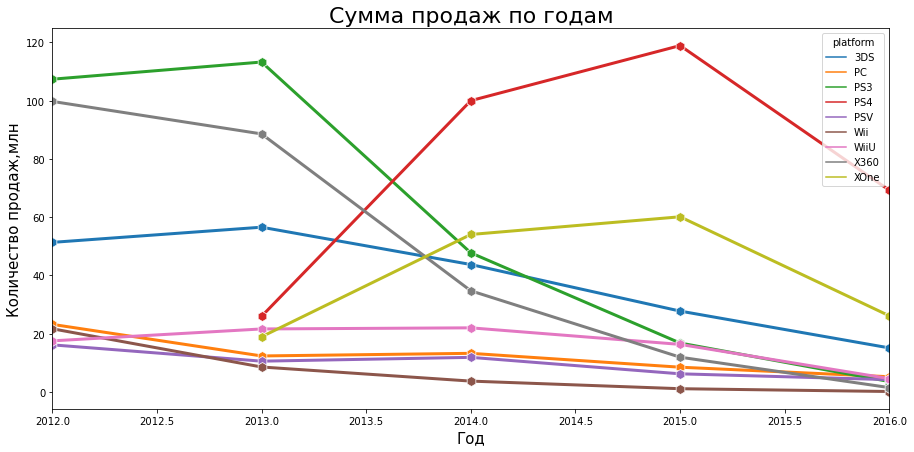

In [23]:
actual_sales = actual_period.query('platform in @top_sales_platform').pivot_table(index='year_of_release',
                                                                      columns = 'platform', values='sum_sales', aggfunc='sum')

plt.figure(figsize=(15,7))
sns.lineplot(data = actual_sales, dashes=False,linewidth=3,marker= 'h', markersize=10)
plt.xlim([2012, 2016])
plt.title('Сумма продаж по годам',fontsize=22)
plt.xlabel('Год',fontsize=15)
plt.ylabel('Количество продаж,млн',fontsize=15)
plt.show()

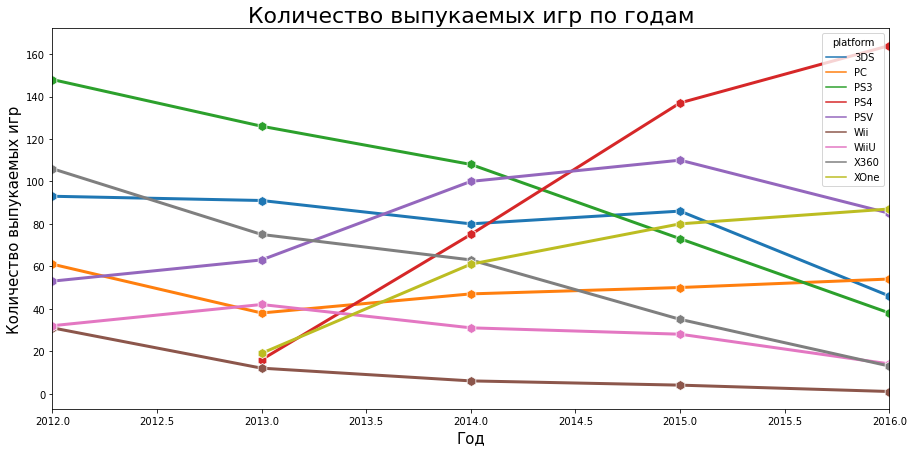

In [24]:
actual_count = actual_period.query('platform in @top_sales_platform').pivot_table(index='year_of_release',
                                                                   columns = 'platform', values='name', aggfunc='count')

plt.figure(figsize=(15,7))
sns.lineplot(data = actual_count,dashes=False,linewidth=3,marker= 'h', markersize=10)
plt.xlim([2012, 2016])
plt.title('Количество выпукаемых игр по годам', fontsize=22)
plt.xlabel('Год',fontsize=15)
plt.ylabel('Количество выпукаемых игр',fontsize=15)
plt.show()

Посмотрим на график выпускаемых игр по платформам с 2012 по 2016 год.
В 2012 году появились две новые платформы: PS4, XOne. Данные за 2016 год могут быть неполными, можно предположить платформы PS4, XOne потенциально прибыльными. 
Добавим к ним же платформу 3DS,PC,PSV, которые не сильно упали по количеству выпускаемых игр 
Остальные платформы тяжело назвать потенциально прибыльными, так как их пик прошел.

### Диаграмма размаха  по глобальным продажам игр в разбивке по платформам

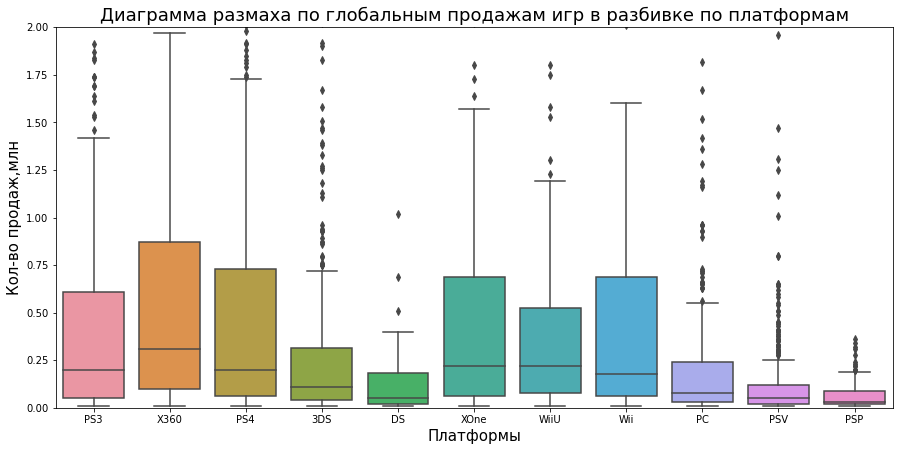

In [25]:
plt.figure(figsize=(15,7))
sns.boxplot(data =actual_period,x='platform',y='sum_sales');
plt.title('Диаграмма размаха по глобальным продажам игр в разбивке по платформам',fontsize=18)
plt.xlabel('Платформы',fontsize=15);
plt.ylabel('Кол-во продаж,млн',fontsize=15);
plt.ylim([0,2]);


Можно выделить 6 платформ, у которых медианные продажи игры около 200 тысяч проданных копий.Количетсво выпущенных игр на платформы  'Wii','Wiiu','X360' сильно снижается на протяжении нескольких лет и близко к нулю.
PS3,3DS,PSV количество выпускаемых игр снижается,но не так сильно как у 'Wii','Wiiu','X360'.
PC,PS4,XOne количество выпускаемых игр растет.
К перспективным платформам можно отнестии PS4,XOne.



In [26]:
perspective = ['PS4','XOne']
perspective_platform = actual_period.query('platform in @perspective')

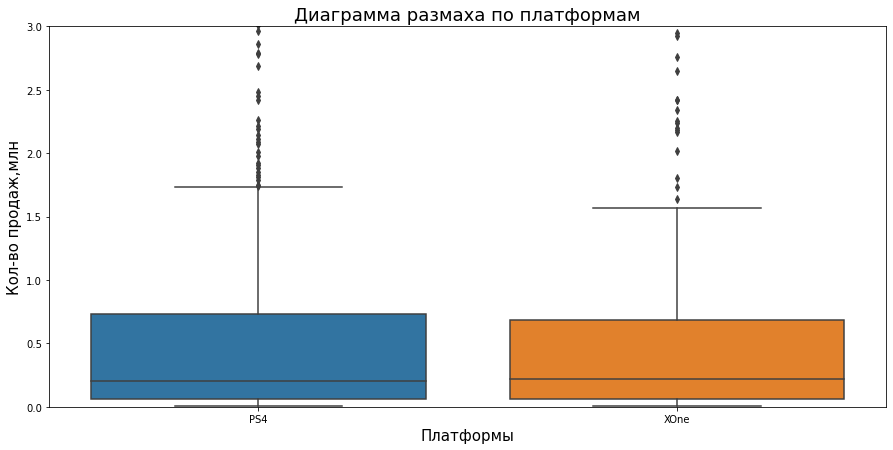

In [27]:
plt.figure(figsize=(15,7))
sns.boxplot(data =perspective_platform,x='platform',y='sum_sales');
plt.title('Диаграмма размаха по платформам',fontsize=18)
plt.xlabel('Платформы',fontsize=15);
plt.ylabel('Кол-во продаж,млн',fontsize=15);
plt.ylim([0,3]);


Медиана платформ PS4 и Xone находится на уровне 200 тысяч проданных копий игры.

### Как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков

Корреляция оценок пользователей и продаж: -0.03195711020455644
Корреляция оценок критиков и продаж: 0.40656790206178123


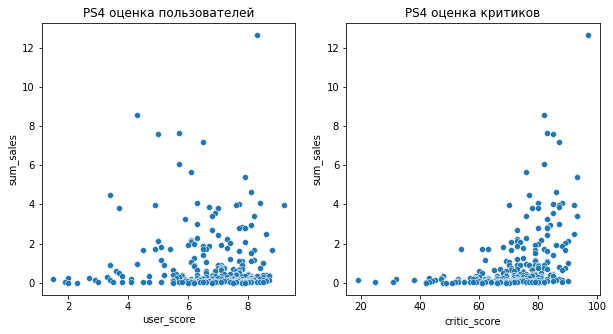

In [28]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
ps4 = actual_period[actual_period['platform']== 'PS4']
print('Корреляция оценок пользователей и продаж:',ps4['user_score'].corr(ps4['sum_sales']))
sns.scatterplot(x = 'user_score',y = 'sum_sales',data=ps4);
plt.title('PS4 оценка пользователей')

plt.subplot(1, 2, 2)
ps4 = actual_period[actual_period['platform']== 'PS4']
print('Корреляция оценок критиков и продаж:',ps4['critic_score'].corr(ps4['sum_sales']))
sns.scatterplot(x = 'critic_score',y = 'sum_sales',data=ps4);
plt.title('PS4 оценка критиков')

plt.show()

Чем выше оценки критиков,тем чаще игры приносили высокую прибыль.Корреляция между оценками критиков и продажами,выше чем корреляция между пользовательскими оценка и продажами

Корреляция оценок пользователей и продаж: -0.004339437514314884
Корреляция оценок критиков и продаж: 0.0944878992931617


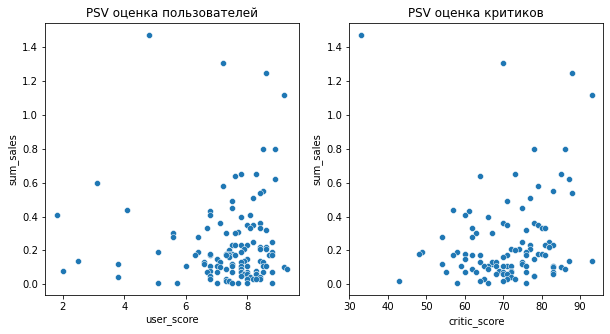

In [29]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
psv = actual_period[actual_period['platform']== 'PSV']
print('Корреляция оценок пользователей и продаж:',psv['user_score'].corr(psv['sum_sales']))
sns.scatterplot(x = 'user_score',y = 'sum_sales',data=psv);
plt.title('PSV оценка пользователей')

plt.subplot(1, 2, 2)
psv = actual_period[actual_period['platform']== 'PSV']
print('Корреляция оценок критиков и продаж:',psv['critic_score'].corr(psv['sum_sales']))
sns.scatterplot(x = 'critic_score',y = 'sum_sales',data=psv);
plt.title('PSV оценка критиков')

plt.show()

Пользовательские оценки чаще всего высокие.

Корреляция оценок пользователей и продаж: -0.12186747630735571
Корреляция оценок критиков и продаж: 0.23724324311567904


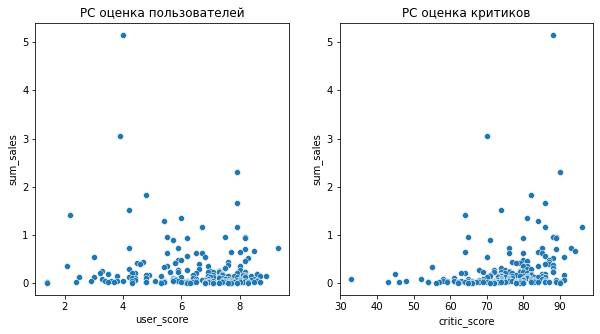

In [30]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
pc = actual_period[actual_period['platform']== 'PC']
print('Корреляция оценок пользователей и продаж:',pc['user_score'].corr(pc['sum_sales']))
sns.scatterplot(x = 'user_score',y = 'sum_sales',data=pc);
plt.title('PC оценка пользователей');

plt.subplot(1, 2, 2)
pc = actual_period[actual_period['platform']== 'PC']
print('Корреляция оценок критиков и продаж:',pc['critic_score'].corr(pc['sum_sales']))
sns.scatterplot(x = 'critic_score',y = 'sum_sales',data=pc);
plt.title('PC оценка критиков');

plt.show()

Корреляция оценок пользователей и продаж: -0.06892505328279418
Корреляция оценок критиков и продаж: 0.41699832800840153


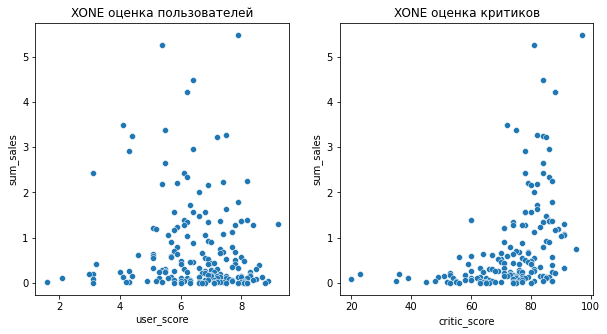

In [31]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
xone = actual_period[actual_period['platform']== 'XOne']
print('Корреляция оценок пользователей и продаж:',xone['user_score'].corr(xone['sum_sales']))
sns.scatterplot(x = 'user_score',y = 'sum_sales',data=xone);
plt.title('XONE оценка пользователей');

plt.subplot(1, 2, 2)
xone = actual_period[actual_period['platform']== 'XOne']
print('Корреляция оценок критиков и продаж:',xone['critic_score'].corr(xone['sum_sales']))
sns.scatterplot(x = 'critic_score',y = 'sum_sales',data=xone);
plt.title('XONE оценка критиков');

plt.show()

Чем выше оценки критиков,тем чаще игры имели хорошие продажи. Оценка пользователей меньше влияет на продажи,по сравнению с оценками критиков.

Оценки пользователей и продаж имеют очень слабую корреляцию.
Оценки критиков на платформах PS4  и XOne имеют слабую корреляцию,в отличие от PC и PSV.
В целом оценки пользователей и критиков имеют слабое влияние на продажи

### Общее распределение игр по жанрам

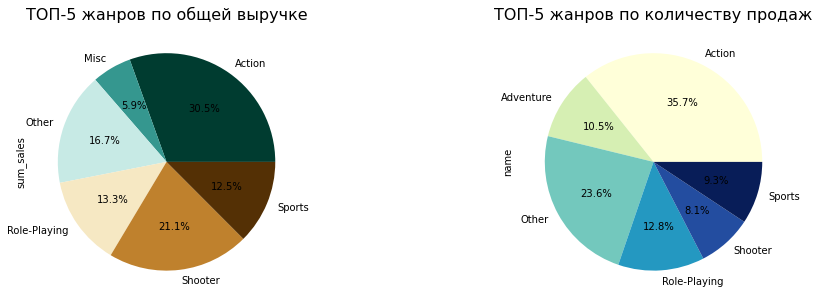

In [32]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))
#Построим круговую диаграмму для жанров по общуй выручке
na = actual_period.groupby(['genre'])['sum_sales'].sum().reset_index().sort_values('sum_sales',ascending=False).reset_index()
na.loc[5:, 'genre'] = 'Other' #объединим жанры с маленькими % в группу "Другие"
na.groupby('genre')['sum_sales'].sum().plot(kind='pie',cmap="BrBG_r",subplots=True,ax=ax1, autopct='%.1f%%')
ax1.set_title('ТОП-5 жанров по общей выручке', fontsize=16)

#Построим круговую диаграмму для жанров по количеству продаж
na = actual_period.groupby(['genre'])['name'].count().reset_index().sort_values('name',ascending=False).reset_index()
na.loc[5:, 'genre'] = 'Other'
na.groupby('genre')['name'].sum().plot(kind='pie',cmap="YlGnBu",subplots=True,ax=ax2, autopct='%.1f%%')
ax2.set_title('ТОП-5 жанров по количеству продаж', fontsize=16)

plt.show()

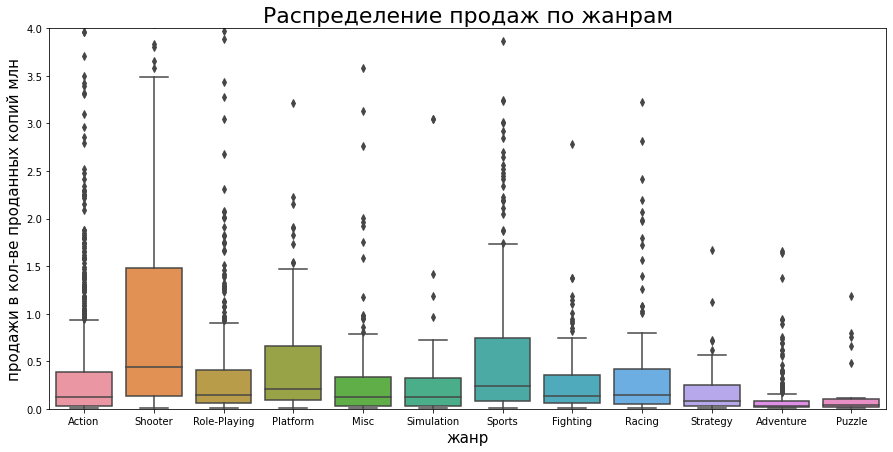

In [33]:
plt.figure(figsize=(15,7))
sns.boxplot(data =actual_period,x='genre',y='sum_sales');
plt.title('Распределение продаж по жанрам', fontsize=22)
plt.xlabel('жанр', fontsize=15)
plt.ylabel('продажи в кол-ве проданных копий млн',fontsize=15)
plt.ylim([0,4]);
plt.show()



In [34]:
medina_genre = actual_period.pivot_table(index='genre',values='sum_sales',
                                         aggfunc='median').sort_values('sum_sales',ascending=False)
medina_genre

,sum_sales
genre,
Shooter,0.440
Sports,0.240
Platform,0.210
Role-Playing,0.140
Racing,0.140
Fighting,0.130
Action,0.120
Misc,0.120
Simulation,0.120


Топ 5 прибыльных жанров.
Shooter- 440 000 проданных копий
Sports- 240 000 проданных копий
Platform - 210 000 проданных копий
Role-Playing - 140 000 проданных копий
Racing	- 140 000 проданных копий

Три жанра с самыми низкими продажами Strategy,Puzzle,Adventure	
Больше всего игр выходит жанра Action

## Портрет пользователя каждого региона  (NA, EU, JP):

### Самые популярные платформы (топ-5) различия в долях продаж

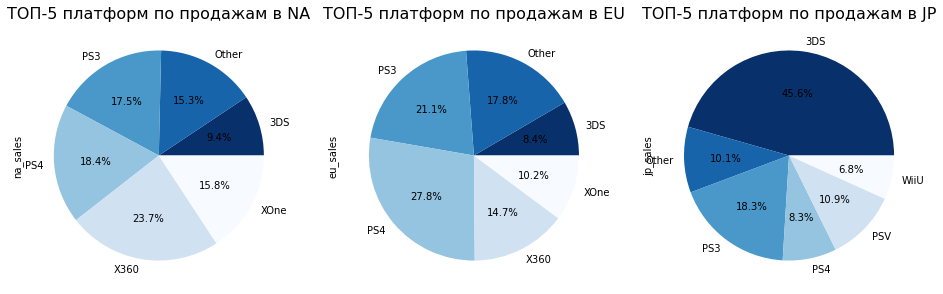

In [35]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16, 5))

na = actual_period.groupby(['platform'])['na_sales'].sum().reset_index().sort_values('na_sales',ascending=False).reset_index()
na.loc[5:, 'platform'] = 'Other'
na.groupby('platform')['na_sales'].sum().plot(kind='pie',cmap="Blues_r",subplots=True, ax=ax1,autopct='%.1f%%')
ax1.set_title('ТОП-5 платформ по продажам в NA', fontsize=16)

eu = actual_period.groupby(['platform'])['eu_sales'].sum().reset_index().sort_values('eu_sales',ascending=False).reset_index()
eu.loc[5:, 'platform'] = 'Other'
eu.groupby('platform')['eu_sales'].sum().plot(kind='pie',cmap="Blues_r",subplots=True, ax=ax2,autopct='%.1f%%')
ax2.set_title('ТОП-5 платформ по продажам в EU', fontsize=16)

jp = actual_period.groupby(['platform'])['jp_sales'].sum().reset_index().sort_values('jp_sales',ascending=False).reset_index()
jp.loc[5:, 'platform'] = 'Other'
jp.groupby('platform')['jp_sales'].sum().plot(kind='pie',cmap="Blues_r",subplots=True, ax=ax3,autopct='%.1f%%')
ax3.set_title('ТОП-5 платформ по продажам в JP', fontsize=16)

plt.show()

- В Северной Америке почти 85% продаж приходится на платформы X360-23,7% ,PS4-18,4%, PS3-17,5%, XOne-15,8%,DS-9,4%
- В Европе ситуация схожа, 82% продаж приходится на эти же платформы. PS4-27,8%,PS3-21,1%,X360-14,7%,XOne-10,2%,DS-8,4%
- В Японии платформы X360,XOne не входят в топ5,а платформа 3DS,которая в NA и EU занимает от 8,4 до 9,4% рынка, в Японии занимает большую часть рынка (45,6%),PS3-18,3%,PSV-10.9%,PS4-8.3%,Wiiu-6.8%.В Японии популярнее платформа Nintendo 3DS японского производства,.

### Самые популярные жанры (топ-5).

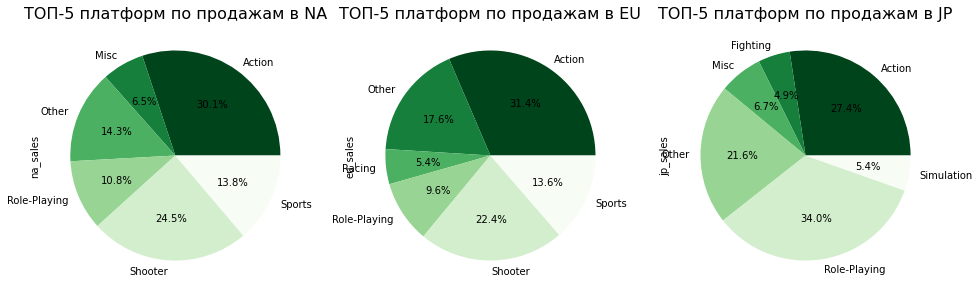

In [36]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16, 5))

na = actual_period.groupby(['genre'])['na_sales'].sum().reset_index().sort_values('na_sales',ascending=False).reset_index()
na.loc[5:, 'genre'] = 'Other'
na.groupby('genre')['na_sales'].sum().plot(kind='pie',cmap="Greens_r",subplots=True, ax=ax1,autopct='%.1f%%')
ax1.set_title('ТОП-5 платформ по продажам в NA', fontsize=16)

eu = actual_period.groupby(['genre'])['eu_sales'].sum().reset_index().sort_values('eu_sales',ascending=False).reset_index()
eu.loc[5:, 'genre'] = 'Other'
eu.groupby('genre')['eu_sales'].sum().plot(kind='pie',cmap="Greens_r",subplots=True, ax=ax2,autopct='%.1f%%')
ax2.set_title('ТОП-5 платформ по продажам в EU', fontsize=16)

jp = actual_period.groupby(['genre'])['jp_sales'].sum().reset_index().sort_values('jp_sales',ascending=False).reset_index()
jp.loc[5:, 'genre'] = 'Other'
jp.groupby('genre')['jp_sales'].sum().plot(kind='pie',cmap="Greens_r",subplots=True, ax=ax3,autopct='%.1f%%')
ax3.set_title('ТОП-5 платформ по продажам в JP', fontsize=16)

plt.show()

- В Северной Америке в топ 5 жанров входят, Action-30.1%,Shooter-24.5%,Sports-13.8%,Role-Playing - 10.8%,Misc-6.5%
- В Европе топ 5 жанров:Action-31.1%,Shooter-22.5%,Sports-13.6%,Role-Playing - 9.6%,Racing-5.4%
4 жанра из 5 повторяются,и имеют схожее распределение процентов по продажам. 
- В Японии предпочтение жанров отличается,от двух других регионов.Самый продаваемый жанр Role-Playing - 34%,в NA и EU он занимал 4 место , и имел около 10%. Action-27.4% ,имеет так же хорошую популярность. Misc -6.7%,Simulation-5.4%,Fighting-4.9%/

В европе и америке лидеры: Action и Shooter и Sports.
На японском рынке шутеры (стрелялки) не входят в ТОП5. Любовь к role-playing - вот что отличает японский рынок.

### Влияние рейтингa ESRB на продажи в отдельном регионе

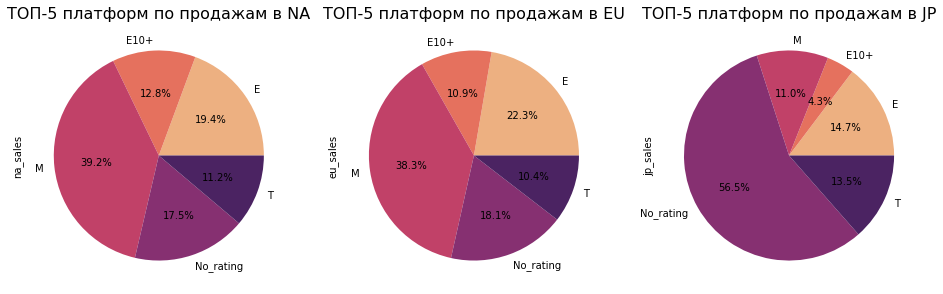

In [37]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16, 5))

na = actual_period.groupby(['rating'])['na_sales'].sum().reset_index().sort_values('na_sales',ascending=False).reset_index()
na.loc[5:, 'rating'] = 'Other'
na.groupby('rating')['na_sales'].sum().plot(kind='pie',cmap="flare",subplots=True, ax=ax1,autopct='%.1f%%')
ax1.set_title('ТОП-5 платформ по продажам в NA', fontsize=16)

eu = actual_period.groupby(['rating'])['eu_sales'].sum().reset_index().sort_values('eu_sales',ascending=False).reset_index()
eu.loc[5:, 'rating'] = 'Other'
eu.groupby('rating')['eu_sales'].sum().plot(kind='pie',cmap="flare",subplots=True, ax=ax2,autopct='%.1f%%')
ax2.set_title('ТОП-5 платформ по продажам в EU', fontsize=16)

jp = actual_period.groupby(['rating'])['jp_sales'].sum().reset_index().sort_values('jp_sales',ascending=False).reset_index()
jp.loc[5:, 'rating'] = 'Other'
jp.groupby('rating')['jp_sales'].sum().plot(kind='pie',cmap="flare",subplots=True, ax=ax3,autopct='%.1f%%')
ax3.set_title('ТОП-5 платформ по продажам в JP', fontsize=16)

plt.show()

В Северной Америке и Европе ,схоже распределение рейтинга ESRB.Большую часть занимает категория "М"(для взрослых) 38,3-39,3%,категория "Е"( «Для всех») занимает 19,4 -22,3%. Игры без рейтинга 17,5- 18,1%,так как показатель довольно высокий,можно предположить рейтинг не влияют на продажи. В Северной Америке и Европе предпочтения по играм схожи.

Самые популярные платформы в Японии компаний Nintendo и PlayStation,при этом Xbox нет в топ10 по продажам,это связано с тем что Nintendo и PlayStation японские компании. Можно предположить ,что эти компании лучше понимают своих покупателей ,а так же возможен патриотизм граждан.

Игры без рейтинга занимают 56%,что в 3 раза больше чем в Европе или Северной Америке.Рейтинг ESBP в Японии не влияет на продажи

In [38]:
print('Количество проданых игр в Северной Америке',actual_period['na_sales'].sum())
print('Количество проданых игр в Европе',actual_period['eu_sales'].sum())
print('Количество проданых игр в Японии',actual_period['jp_sales'].sum())

Количество проданых игр в Северной Америке 590.97
Количество проданых игр в Европе 506.82000000000005
Количество проданых игр в Японии 192.58


## Проверка гипотез

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые


In [39]:
games['user_score'] = games['user_score'].dropna().astype('int')

In [40]:
ttest_xone = actual_period.query('platform == "XOne" and user_score > 0')['user_score']
ttest_pc =  actual_period.query('platform == "PC" and user_score > 0')['user_score']

In [41]:
print('Дисперсия Xbox One', np.var(ttest_xone ))
print('Дисперсия PC', np.var(ttest_pc))

Дисперсия Xbox One 1.8965188383045533
Дисперсия PC 2.7569952398906565


H0:Средние пользовательские рейтинги платформ Xbox One и PC одинаковые  
H1:Средние пользовательские рейтинги платформ Xbox One и PC разные

In [42]:
alpha = .05

results = st.ttest_ind(ttest_xone,ttest_pc,equal_var = False)

print('р-значение:',results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')
    
print('Средние оценки платформы "XOne":',ttest_xone.mean())
print('Средние оценки платформы "PC":',ttest_pc.mean())

р-значение: 0.5489537965134912
Не получилось отвергнуть нулевую гипотезу
Средние оценки платформы "XOne": 6.52142857142857
Средние оценки платформы "PC": 6.428640776699027


Значение p-value превышает уровень значимости, примем H0: "Средние пользовательские рейтинги платформ Xbox One и PC равны"


### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

H0: Средние пользовательские рейтинги жанров Action и Sports одинаковые  
H1: Средние пользовательские рейтинги жанров Action и Sports разные.    

In [43]:
action = actual_period.query('genre == "Action" and user_score > 0')['user_score']
sports = actual_period.query('genre == "Sports" and user_score > 0')['user_score']

In [44]:
print('Дисперсия жанра "Action"', np.var(action))
print('Дисперсия жанра "Sports"', np.var(sports))

Дисперсия жанра "Action" 1.8854720340439228
Дисперсия жанра "Sports" 3.007388297172914


In [45]:
alpha = .05

results = st.ttest_ind(action,sports,equal_var=False)

print('p-значение',results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')
    
print('Средние оценки платформы "Action":',action.mean())
print('Средние оценки платформы "Sports":',sports.mean())

p-значение 4.24307776572644e-20
Отвергаем нулевую гипотезу
Средние оценки платформы "Action": 6.825047801147237
Средние оценки платформы "Sports": 5.455897435897437


Отвергаем нулевую гипотезу о равных пользовательские рейтинги жанров Action и Sports.Принимаем гипотезу "H1: Средние пользовательские рейтинги жанров Action и Sports разные."

## Общий вывод

1.Данные проверили на дубликаты,обработали пропуски,изменили тип данных в столбце.
Столбцы привели к нижнему регистру,посчитали сумарные продажи во всех регионах и добавили в датасет.  
2.Количество компьютерных игр было на пике в 2009 году.Средний срок жизни платформы около 10 лет.
В качестве актуального периода, на основании которого нужно будет строить прогноз на 2017 год,
возьмем отрезок с 2012 года включительно.  
В 2012 году появились две новые платформы: PS4, XOne,можно предположить платформы PS4, XOne потенциально прибыльными.
Добавим к ним же платформы 3DS,PC,PSV, которые не сильно упали по количеству выпускаемых игр.   
Отзывы критиков в большей степени влияют на продажи, чем отзывы пользователей.  
Самыми прибыльными оказались жанры Action, Shooter и Role-Playing  
Самые низкие сборы у жанров Adventure, Puzzle и Strategy. Больше всего игр выходит жанра Action.  
3.В Северной Америке и Европе картина примерно одинакова:  
лидируют платформы PS4, PS3 и X360 с небольшой разницей в распределении продаж;  
самые популярные жанры: Action, Shooter, Sports;  
с большим отрывом по продажам лидирует M (18+).  
В Японии лидируют платформа 3DS - портативная игровая система производства Nintendo Япония;
самый популярный жанр - Role-playing(ролевая игра).  
4.Проверили две гипотезы:  
Средние пользовательские рейтинги платформ Xbox One и PC равны. Принимаем нулевую гипотезу.  
Средние пользовательские рейтинги жанров Action и Sports равны. Отвергаем нулевую гипотезу.  
5.Рынок видео игр отличается между Северной Америкой,Европой и Японией.  
Планируя рекламную компанию на 2017год в Северной Америке и в Европе: 
- Большую популярность имеют жанры Action, Sports, Shooter
- Платформы PS4 и X360  
- рейтинг ESRB -"М"

Планируя рекламную компанию на 2017год в Японии:
- Большую популярность имеют жанр Role-playing
- Платформы 3DS
- Рейтинг не очень важен,большое количество игр без рейтинга

Больше всего проданных игр было в Северной Америке.